<a href="https://colab.research.google.com/github/shuvookd/Thesis_MSc/blob/main/Thesis_UNSW_NB15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load the training set
train_file_path = '/content/UNSW_NB15_testing-set.parquet'
train_data = pd.read_parquet(train_file_path)

# Load the testing set
test_file_path = '/content/UNSW_NB15_training-set.parquet'
test_data = pd.read_parquet(test_file_path)

In [4]:
# Display basic info about the datasets
print("Training Data Info:")
print(train_data.info())

print("\nTesting Data Info:")
print(test_data.info())

# Optionally, display the first few rows
print("\nFirst few rows of training data:")
display(train_data.head())

print("\nFirst few rows of testing data:")
display(test_data.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   dur                82332 non-null  float32 
 1   proto              82332 non-null  category
 2   service            82332 non-null  category
 3   state              82332 non-null  category
 4   spkts              82332 non-null  int16   
 5   dpkts              82332 non-null  int16   
 6   sbytes             82332 non-null  int32   
 7   dbytes             82332 non-null  int32   
 8   rate               82332 non-null  float32 
 9   sload              82332 non-null  float32 
 10  dload              82332 non-null  float32 
 11  sloss              82332 non-null  int16   
 12  dloss              82332 non-null  int16   
 13  sinpkt             82332 non-null  float32 
 14  dinpkt             82332 non-null  float32 
 15  sjit               82332 non-null

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09375,180363632.0,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00000,881000000.0,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00000,854400000.0,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.65625,600000000.0,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00000,850400000.0,...,0,0,2,1,0,0,0,0,Normal,0



First few rows of testing data:


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,0,0,2,1,0,0,0,0,Normal,0


In [5]:
# Print dimensions of the datasets
print("Training Data Dimensions (rows, columns):", train_data.shape)
print("Testing Data Dimensions (rows, columns):", test_data.shape)

Training Data Dimensions (rows, columns): (82332, 36)
Testing Data Dimensions (rows, columns): (175341, 36)


In [6]:
# Check for missing values in both training and testing datasets
print("Missing values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing values in Testing Data:")
print(test_data.isnull().sum())

Missing values in Training Data:
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

Missing values in Testing Data:
dur                  0
proto                0
service              0
state                0
s

In [7]:
# Check for duplicate rows in the training and testing datasets
print("Duplicate rows in Training Data:", train_data.duplicated().sum())
print("Duplicate rows in Testing Data:", test_data.duplicated().sum())

Duplicate rows in Training Data: 32361
Duplicate rows in Testing Data: 78519


In [8]:
# Statistical summary for training data
print("Statistical Summary of Training Data:")
display(train_data.describe())

# Statistical summary for testing data
print("\nStatistical Summary of Testing Data:")
display(test_data.describe())

Statistical Summary of Training Data:


,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,...,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,82410.890625,6.454902e+07,6.305469e+05,4.753692,6.308556,...,116.275069,0.094277,1.595372e+03,4.928898,3.663011,0.008284,0.008381,0.129743,0.011126,0.550600
std,4.709841,133.916353,115.574086,1.716423e+05,1.514715e+05,148654.421875,1.798863e+08,2.393292e+06,64.649620,55.708021,...,244.600271,0.542922,3.806697e+04,8.389545,5.915386,0.091171,0.092485,0.638683,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,28.606114,1.120247e+04,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2650.176758,5.770032e+05,2.112951e+03,1.000000,0.000000,...,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,111111.109375,6.514286e+07,1.585808e+04,3.000000,2.000000,...,87.000000,0.000000,0.000000e+00,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1000000.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,...,1500.000000,131.000000,5.242880e+06,59.000000,38.000000,2.000000,2.000000,16.000000,1.000000,1.000000



Statistical Summary of Testing Data:


,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,...,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,95406.179688,7.345403e+07,6.712055e+05,4.953000,6.948010,...,124.173382,0.105982,2.144292e+03,5.383538,4.206255,0.014948,0.014948,0.133066,0.015752,0.680622
std,6.483313,136.887597,110.258271,1.747656e+05,1.436542e+05,165417.671875,1.883701e+08,2.423637e+06,66.005059,52.732999,...,258.317056,0.776911,5.420797e+04,8.047104,5.783585,0.126048,0.126048,0.701208,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,32.786140,1.305334e+04,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3225.806641,8.796748e+05,1.447023e+03,0.000000,0.000000,...,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,125000.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,...,89.000000,0.000000,0.000000e+00,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1000000.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,...,1458.000000,172.000000,6.558056e+06,51.000000,46.000000,4.000000,4.000000,30.000000,1.000000,1.000000


In [9]:
# Check class distribution in the training set
print("Class distribution in Training Data ('label' column):")
print(train_data['label'].value_counts())

# Check attack categories distribution in the training set
print("\nAttack categories distribution in Training Data ('attack_cat' column):")
print(train_data['attack_cat'].value_counts())

# Check class distribution in the testing set
print("\nClass distribution in Testing Data ('label' column):")
print(test_data['label'].value_counts())

# Check attack categories distribution in the testing set
print("\nAttack categories distribution in Testing Data ('attack_cat' column):")
print(test_data['attack_cat'].value_counts())

Class distribution in Training Data ('label' column):
label
1    45332
0    37000
Name: count, dtype: int64

Attack categories distribution in Training Data ('attack_cat' column):
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

Class distribution in Testing Data ('label' column):
label
1    119341
0     56000
Name: count, dtype: int64

Attack categories distribution in Testing Data ('attack_cat' column):
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


Class distribution (normal vs attack) in Training Data:
label
1    45332
0    37000
Name: count, dtype: int64


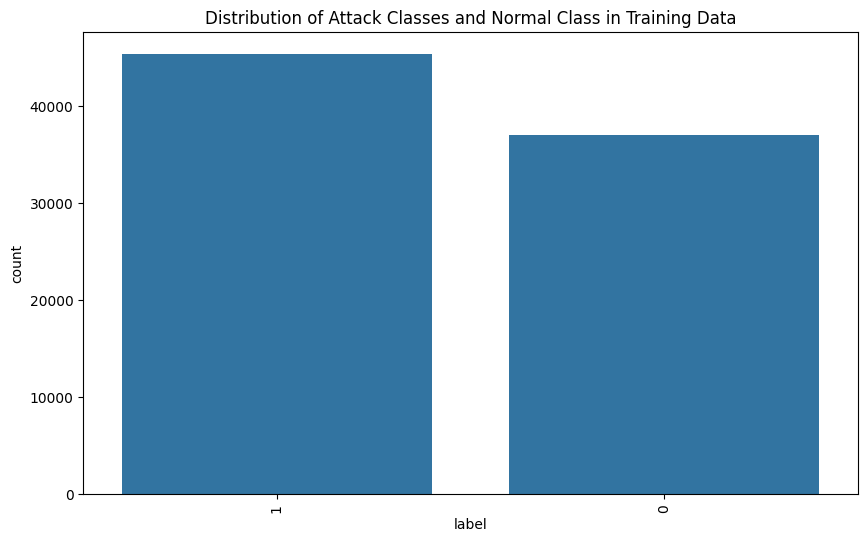

In [10]:
# Assuming the target label column is named 'label' and contains both normal and attack class info
if 'label' in train_data.columns:
    print("Class distribution (normal vs attack) in Training Data:")
    print(train_data['label'].value_counts())

    # Plot the distribution of classes
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x='label', order=train_data['label'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Attack Classes and Normal Class in Training Data')
    plt.show()


Attack Type Distribution in Training Data:
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


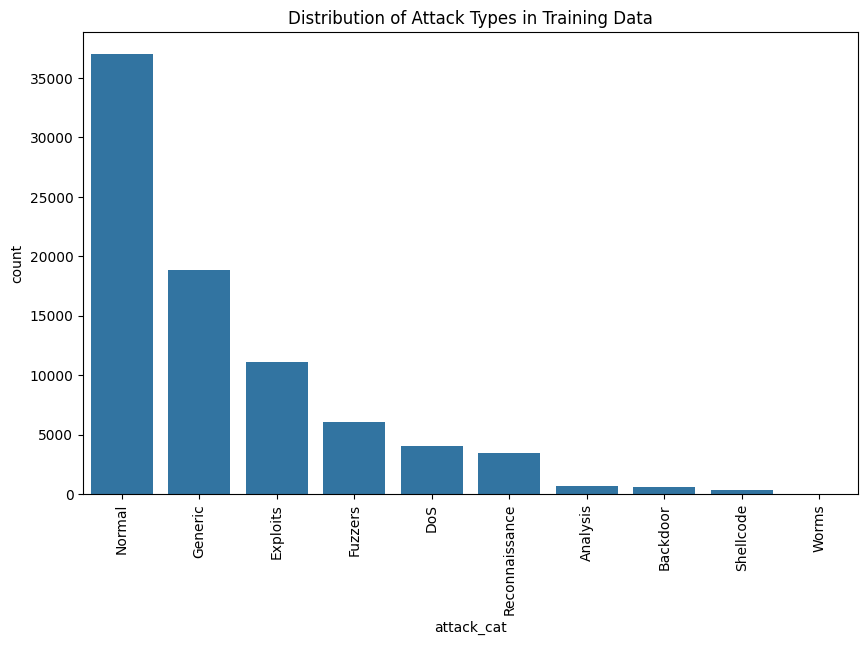

In [11]:
# Check the breakdown of different attack classes
if 'attack_cat' in train_data.columns:
    print("\nAttack Type Distribution in Training Data:")
    print(train_data['attack_cat'].value_counts())

    # Plot attack type distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x='attack_cat', order=train_data['attack_cat'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Attack Types in Training Data')
    plt.show()


Protocol Distribution in Training Data:
proto
tcp         43095
udp         29418
unas         3515
arp           987
ospf          676
            ...  
wb-expak       32
xtp            32
zero           32
ib             31
igmp           30
Name: count, Length: 131, dtype: int64


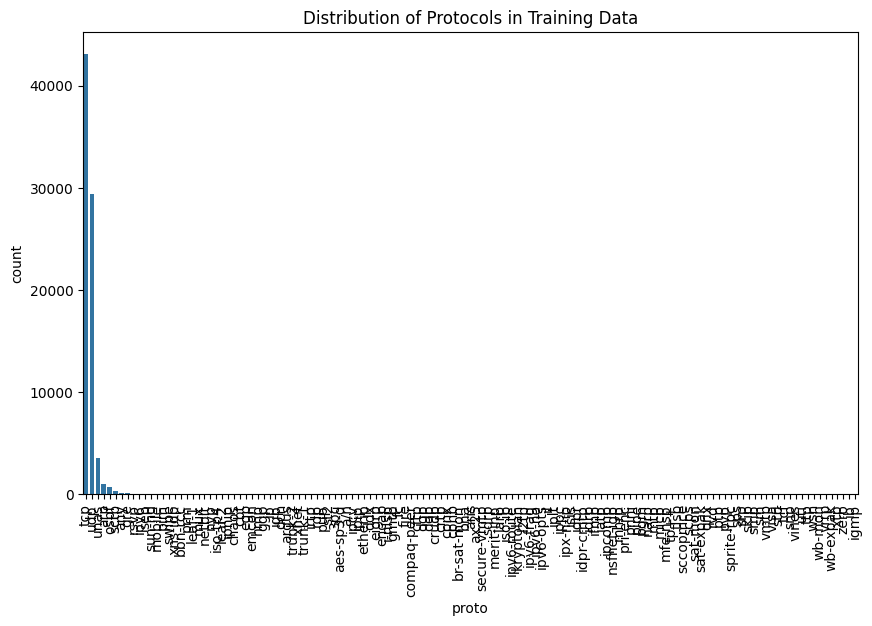


Service Distribution in Training Data:
service
-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: count, dtype: int64


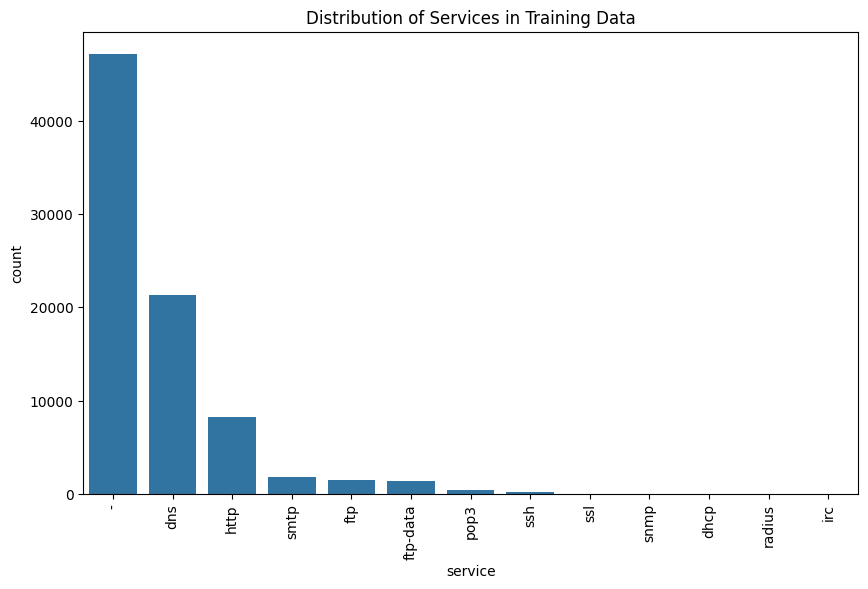

In [12]:
# Examine protocol distribution
if 'proto' in train_data.columns:
    print("\nProtocol Distribution in Training Data:")
    print(train_data['proto'].value_counts())

    # Plot protocol distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x='proto', order=train_data['proto'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Protocols in Training Data')
    plt.show()

# Examine service distribution (if available)
if 'service' in train_data.columns:
    print("\nService Distribution in Training Data:")
    print(train_data['service'].value_counts())

    # Plot service distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x='service', order=train_data['service'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Services in Training Data')
    plt.show()

In [13]:
# Cross-tabulate proto with attack classes
if 'label' in train_data.columns and 'proto' in train_data.columns:
    proto_attack_distribution = pd.crosstab(train_data['proto'], train_data['label'])
    print("\nProtocol vs Attack Type Cross-tab:")
    print(proto_attack_distribution)

# Cross-tabulate service with attack classes (if service feature exists)
if 'label' in train_data.columns and 'service' in train_data.columns:
    service_attack_distribution = pd.crosstab(train_data['service'], train_data['label'])
    print("\nService vs Attack Type Cross-tab:")
    print(service_attack_distribution)


Protocol vs Attack Type Cross-tab:
label      0   1
proto           
3pc        0  32
a/n        0  32
aes-sp3-d  0  32
any        0  96
argus      0  33
...       ..  ..
wsn        0  32
xnet       0  33
xns-idp    0  34
xtp        0  32
zero       0  32

[131 rows x 2 columns]

Service vs Attack Type Cross-tab:
label         0      1
service               
-         27375  19778
dhcp          0     26
dns        3068  18299
ftp         758    794
ftp-data    949    447
http       4013   4274
irc           0      5
pop3          0    423
radius        2      7
smtp        635   1216
snmp          0     29
ssh         200      4
ssl           0     30


Highly Correlated Features:
           Feature 1         Feature 2  Correlation
0             sbytes             spkts     0.965750
1             dbytes             dpkts     0.976419
2              sloss             spkts     0.973644
3              sloss            sbytes     0.995027
4              dloss             dpkts     0.981506
5              dloss            dbytes     0.997109
6               dwin              swin     0.960125
7             synack            tcprtt     0.939473
8   ct_dst_sport_ltm  ct_src_dport_ltm     0.911637
9         ct_ftp_cmd      is_ftp_login     0.994341
10   is_sm_ips_ports            sinpkt     0.944506


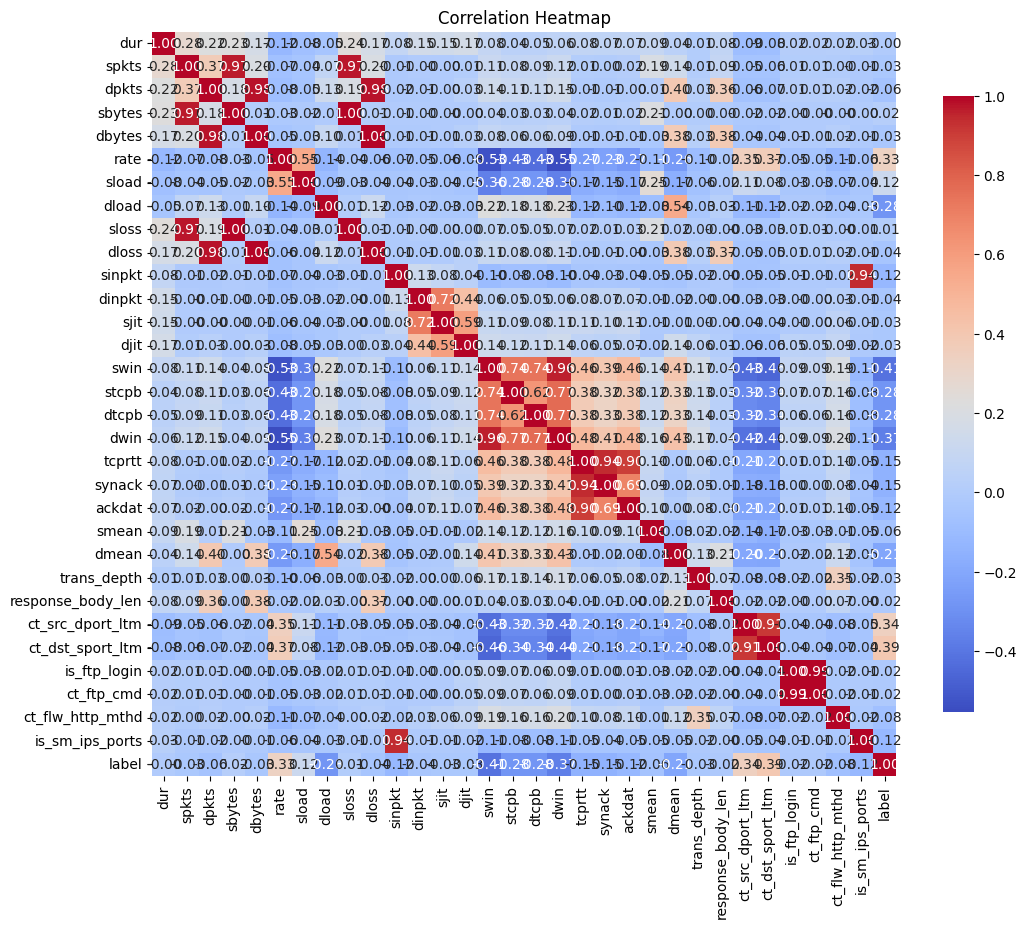

In [14]:
# Step 1: Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_columns]

# Step 2: Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Step 3: Identify highly correlated features
threshold = 0.9
high_corr_pairs = []

# Loop through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Print highly correlated features
print("Highly Correlated Features:")
print(high_corr_df)

# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

    Principal Component  Explained Variance  Cumulative Variance
0                     1        1.890340e-01             0.189034
1                     2        1.132630e-01             0.302297
2                     3        9.002408e-02             0.392321
3                     4        7.080014e-02             0.463121
4                     5        6.835973e-02             0.531481
5                     6        6.301214e-02             0.594493
6                     7        5.962813e-02             0.654121
7                     8        4.704385e-02             0.701165
8                     9        4.131997e-02             0.742485
9                    10        3.408806e-02             0.776573
10                   11        3.001308e-02             0.806586
11                   12        2.503472e-02             0.831621
12                   13        2.474275e-02             0.856364
13                   14        2.321326e-02             0.879577
14                   15  

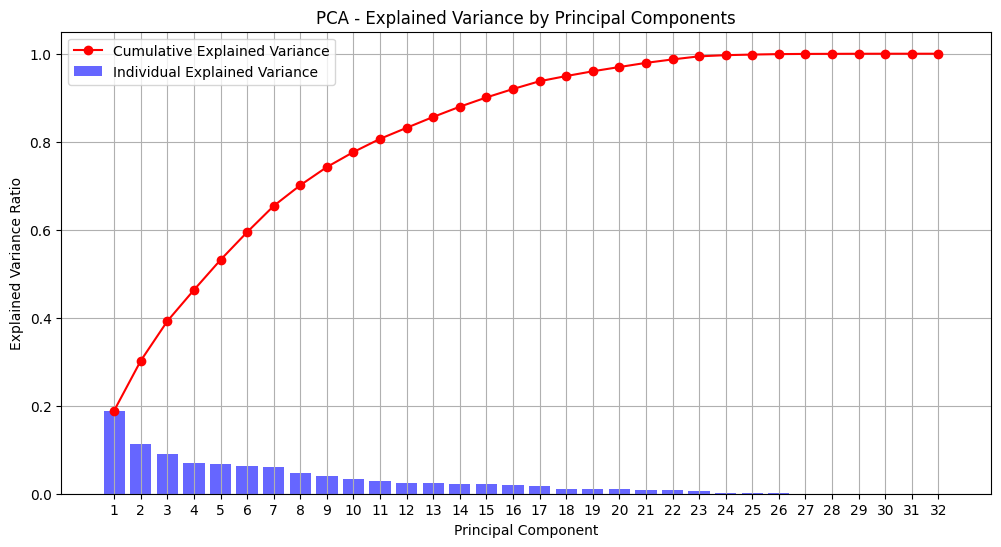

In [15]:
# Step 1: Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_columns]

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 3: Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Step 4: Analyze the results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create a DataFrame to hold the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Print explained variance
print(explained_variance_df)

# Step 5: Visualize explained variance
plt.figure(figsize=(12, 6))
plt.bar(explained_variance_df['Principal Component'], explained_variance_df['Explained Variance'], alpha=0.6, color='b', label='Individual Explained Variance')
plt.plot(explained_variance_df['Principal Component'], explained_variance_df['Cumulative Variance'], marker='o', color='r', label='Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_df) + 1))
plt.legend()
plt.grid()
plt.show()

##Load Data

In [16]:
# Load data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load parquet files
train = pd.read_parquet("/content/UNSW_NB15_training-set.parquet")
test = pd.read_parquet("/content/UNSW_NB15_testing-set.parquet")

In [17]:
# Combine for SSL pre-training
df = pd.concat([train, test])

In [18]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'attack_cat'], errors='ignore')  # Ignore if columns don't exist

In [19]:
# Encode categorical features
cat_cols = ['proto', 'service', 'state']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [20]:
# Normalize numerical features
num_cols = df.select_dtypes(include=[np.number]).columns.difference(['label'])
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [21]:
# Separate features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

##Self-Supervised Pre-training (SimCLR Approach)

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [23]:
# Data augmentation for network flows
def augment(x, noise_level=0.1):
    noise = tf.random.normal(tf.shape(x), mean=0.0, stddev=noise_level)
    return x + noise

In [24]:
# Define encoder (base model)
def get_encoder(input_shape):
    inputs = layers.Input(input_shape)
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(32)(x)  # Projection head
    return models.Model(inputs, outputs)

In [25]:
# Contrastive loss (NT-Xent)
def contrastive_loss(z1, z2, temperature=0.1):
    z1 = tf.math.l2_normalize(z1, axis=1)
    z2 = tf.math.l2_normalize(z2, axis=1)
    logits = tf.matmul(z1, z2, transpose_b=True) / temperature
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf.eye(tf.shape(z1)[0])))

In [26]:
# Initialize model
input_shape = (X.shape[1],)
encoder = get_encoder(input_shape)

# Training loop (SimCLR)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
batch_size = 256
epochs = 1

for epoch in range(epochs):
    for i in range(0, len(X), batch_size):
        batch = X[i:i+batch_size]
        x1 = augment(batch)
        x2 = augment(batch)

        with tf.GradientTape() as tape:
            z1 = encoder(x1)
            z2 = encoder(x2)
            loss = contrastive_loss(z1, z2)

        grads = tape.gradient(loss, encoder.trainable_weights)
        optimizer.apply_gradients(zip(grads, encoder.trainable_weights))

    print(f"Epoch {epoch+1}, Loss: {loss.numpy()}")

Epoch 1, Loss: 198.77371215820312


##Extract SSL Features & Train Classifier

In [27]:
# Extract features from SSL encoder
X_ssl = encoder.predict(X)

8053/8053 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [28]:
# Split into train/test (use original splits for fair comparison)
X_train_ssl, X_test_ssl = X_ssl[:len(train)], X_ssl[len(train):]
y_train, y_test = y[:len(train)], y[len(train):]

In [29]:
# Train a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_ssl, y_train)
y_pred = clf.predict(X_test_ssl)

print("With SSL Pre-training:")
print(classification_report(y_test, y_pred))

With SSL Pre-training:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73     37000
           1       0.75      0.97      0.84     45332

    accuracy                           0.80     82332
   macro avg       0.84      0.79      0.79     82332
weighted avg       0.83      0.80      0.79     82332



##Compare with Baseline (No SSL)

In [30]:
# Train on raw features (no SSL)
X_train_raw, X_test_raw = X[:len(train)], X[len(train):]

clf_raw = RandomForestClassifier(n_estimators=100)
clf_raw.fit(X_train_raw, y_train)
y_pred_raw = clf_raw.predict(X_test_raw)

print("Without SSL Pre-training:")
print(classification_report(y_test, y_pred_raw))

Without SSL Pre-training:
              precision    recall  f1-score   support

           0       0.96      0.74      0.83     37000
           1       0.82      0.97      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.89      0.86      0.86     82332
weighted avg       0.88      0.87      0.87     82332



##Tuning Hyperparameters

In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # Try smaller learning rate


In [36]:
def get_encoder(input_shape):
    inputs = layers.Input(input_shape)
    x = layers.Dense(256, activation='relu')(inputs)  # Increase size of hidden layers
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(32)(x)  # Projection head
    return models.Model(inputs, outputs)


## Explore Data Augmentation Strategies

In [37]:
def augment(x, noise_level=0.1, shift_range=0.05):
    # Adding Gaussian noise
    noise = tf.random.normal(tf.shape(x), mean=0.0, stddev=noise_level)
    x_noisy = x + noise

    # Random shift (if applicable to your features)
    shift = tf.random.uniform(tf.shape(x), minval=-shift_range, maxval=shift_range)
    x_augmented = x_noisy + shift
    return x_augmented


##Increase Model Complexity and Use Regularization

In [38]:
def get_encoder(input_shape):
    inputs = layers.Input(input_shape)
    x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
    x = layers.Dropout(0.2)(x)  # Dropout layer for regularization
    x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    outputs = layers.Dense(32)(x)  # Projection head
    return models.Model(inputs, outputs)


## Evaluate Different Downstream Classifiers

In [39]:
import lightgbm as lgb

clf_lgb = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=20, random_state=42)
clf_lgb.fit(X_train_ssl, y_train)

y_pred_lgb = clf_lgb.predict(X_test_ssl)
print("LightGBM classification report:")
print(classification_report(y_test, y_pred_lgb))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 119341, number of negative: 56000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680622 -> initscore=0.756633
[LightGBM] [Info] Start training from score 0.756633


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM classification report:
              precision    recall  f1-score   support

           0       0.88      0.52      0.65     37000
           1       0.71      0.94      0.81     45332

    accuracy                           0.75     82332
   macro avg       0.79      0.73      0.73     82332
weighted avg       0.78      0.75      0.74     82332



##Experiment with Different Epoch Configurations

In [40]:
# Load your data (ensure this has already been done)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load parquet files
train = pd.read_parquet("/content/UNSW_NB15_training-set.parquet")
test = pd.read_parquet("/content/UNSW_NB15_testing-set.parquet")

# Combine datasets for SSL pre-training
df = pd.concat([train, test])

# Drop unnecessary columns
df = df.drop(columns=['id', 'attack_cat'], errors='ignore')  # Drop 'id' and 'attack_cat' columns if they exist

# Encode categorical features
cat_cols = ['proto', 'service', 'state']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features (X) and labels (y)
X = df.drop('label', axis=1)
y = df['label']

# Split into train and test sets (train/test split from the original dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data shapes
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")


Scaled training data shape: (206138, 34)
Scaled testing data shape: (51535, 34)


##Train SimCLR with Different Epoch Configurations

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define encoder model for SimCLR
def get_encoder(input_shape):
    inputs = layers.Input(input_shape)
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(32)(x)  # Projection head
    return models.Model(inputs, outputs)

# Contrastive loss function (NT-Xent)
def contrastive_loss(z1, z2, temperature=0.1):
    z1 = tf.math.l2_normalize(z1, axis=1)
    z2 = tf.math.l2_normalize(z2, axis=1)
    logits = tf.matmul(z1, z2, transpose_b=True) / temperature
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf.eye(tf.shape(z1)[0])))

# Data augmentation function
def augment(x, noise_level=0.1):
    noise = tf.random.normal(tf.shape(x), mean=0.0, stddev=noise_level)
    return x + noise

# Set up training configurations
epochs_list = [2, 4, 6]  # Epoch configurations to experiment
batch_size = 256  # You can experiment with different batch sizes
learning_rate = 0.001

# Initialize results list to track performance
results = []

# Loop through epoch configurations
for epochs in epochs_list:
    print(f"\n=== Training SSL with {epochs} epochs ===")

    # Initialize the model for each configuration
    encoder = get_encoder((X_train_scaled.shape[1],))  # Input shape based on your data
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Pre-training loop
    for epoch in range(epochs):
        for i in range(0, len(X_train_scaled), batch_size):
            batch = X_train_scaled[i:i+batch_size]
            x1 = augment(batch)
            x2 = augment(batch)

            with tf.GradientTape() as tape:
                z1 = encoder(x1)
                z2 = encoder(x2)
                loss = contrastive_loss(z1, z2)

            grads = tape.gradient(loss, encoder.trainable_weights)
            optimizer.apply_gradients(zip(grads, encoder.trainable_weights))

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.numpy()}")

    # After training, extract features using the encoder (SSL embeddings)
    X_emb = encoder.predict(X_train_scaled)
    X_train_ssl = X_emb[:len(train)]
    X_test_ssl = X_emb[len(train):]

    results.append({
        'epochs': epochs,
        'loss': loss.numpy()
    })

# Display results of SSL pre-training with different epochs
print("\nTraining Results:")
for result in results:
    print(f"Epochs: {result['epochs']} — Final Loss: {result['loss']:.4f}")



=== Training SSL with 2 epochs ===
Epoch 1/2, Loss: 44.84111404418945
Epoch 2/2, Loss: 47.968040466308594
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step

=== Training SSL with 4 epochs ===
Epoch 1/4, Loss: 36.82181930541992
Epoch 2/4, Loss: 35.05422592163086
Epoch 3/4, Loss: 32.72331237792969
Epoch 4/4, Loss: 28.82535171508789
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step

=== Training SSL with 6 epochs ===
Epoch 1/6, Loss: 8.326866149902344
Epoch 2/6, Loss: 8.000802040100098
Epoch 3/6, Loss: 11.085896492004395
Epoch 4/6, Loss: 15.500993728637695
Epoch 5/6, Loss: 16.782102584838867
Epoch 6/6, Loss: 17.977764129638672
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step

Training Results:
Epochs: 2 — Final Loss: 47.9680
Epochs: 4 — Final Loss: 28.8254
Epochs: 6 — Final Loss: 17.9778


## Compare with Baseline Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train baseline RandomForest on raw scaled data (no SSL)
clf_baseline = RandomForestClassifier(n_estimators=100)
clf_baseline.fit(X_train_scaled, y_train)

# Predict and evaluate on test data
y_pred_baseline = clf_baseline.predict(X_test_scaled)
print("Baseline RandomForest Classification Report:")
print(classification_report(y_test, y_pred_baseline))


Baseline RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     18613
           1       0.96      0.95      0.95     32922

    accuracy                           0.94     51535
   macro avg       0.94      0.94      0.94     51535
weighted avg       0.94      0.94      0.94     51535



## Extraction of SSL Features

In [44]:
# Extract SSL features from encoder for training and testing sets
X_train_ssl = encoder.predict(X_train_scaled)  # For training data
X_test_ssl = encoder.predict(X_test_scaled)  # For testing data

# Ensure the labels match the SSL features
y_train, y_test = y[:len(X_train_ssl)], y[len(X_train_ssl):]

# Print shapes to confirm alignment
print(f"SSL training features shape: {X_train_ssl.shape}")
print(f"SSL testing features shape: {X_test_ssl.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


6442/6442 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
SSL training features shape: (206138, 32)
SSL testing features shape: (51535, 32)
Training labels shape: (206138,)
Testing labels shape: (51535,)


## Train and Evaluate RandomForest on SSL Features

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Loop through each epoch configuration and train RandomForest on SSL features
for result in results:
    epochs = result['epochs']
    print(f"\n=== Evaluating RandomForest with SSL features (Epochs={epochs}) ===")

    # Train the classifier with SSL embeddings (from the trained SimCLR model)
    clf_ssl = RandomForestClassifier(n_estimators=100)
    clf_ssl.fit(X_train_ssl, y_train)

    # Predict and evaluate on test data
    y_pred_ssl = clf_ssl.predict(X_test_ssl)

    # Print classification report for RandomForest on SSL features
    print(f"Epochs: {epochs} — Classification Report for RandomForest on SSL features:")
    print(classification_report(y_test, y_pred_ssl))



=== Evaluating RandomForest with SSL features (Epochs=2) ===
Epochs: 2 — Classification Report for RandomForest on SSL features:
              precision    recall  f1-score   support

           0       0.58      0.09      0.16     29320
           1       0.43      0.91      0.59     22215

    accuracy                           0.45     51535
   macro avg       0.50      0.50      0.37     51535
weighted avg       0.51      0.45      0.34     51535


=== Evaluating RandomForest with SSL features (Epochs=4) ===
Epochs: 4 — Classification Report for RandomForest on SSL features:
              precision    recall  f1-score   support

           0       0.57      0.09      0.16     29320
           1       0.43      0.91      0.59     22215

    accuracy                           0.44     51535
   macro avg       0.50      0.50      0.37     51535
weighted avg       0.51      0.44      0.34     51535


=== Evaluating RandomForest with SSL features (Epochs=6) ===
Epochs: 6 — Classificati

## Evaluate and Collect Model Performance

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import lightgbm as lgb
import xgboost as xgb  # Import XGBoost

# Initialize a dictionary to store results for each model
model_comparison_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Baseline model (RandomForest on raw data)
clf_baseline = RandomForestClassifier(n_estimators=100)
clf_baseline.fit(X_train_scaled, y_train)
y_pred_baseline = clf_baseline.predict(X_test_scaled)
baseline_report = classification_report(y_test, y_pred_baseline, output_dict=True)

# Store baseline results
model_comparison_results['Model'].append('RandomForest (Baseline)')
model_comparison_results['Accuracy'].append(baseline_report['accuracy'])
model_comparison_results['Precision'].append(baseline_report['weighted avg']['precision'])
model_comparison_results['Recall'].append(baseline_report['weighted avg']['recall'])
model_comparison_results['F1-Score'].append(baseline_report['weighted avg']['f1-score'])

# Loop through each epoch configuration and evaluate models on SSL features
for result in results:
    epochs = result['epochs']
    print(f"\n=== Evaluating models for Epochs={epochs} ===")

    # Train RandomForest on SSL features
    clf_rf = RandomForestClassifier(n_estimators=100)
    clf_rf.fit(X_train_ssl, y_train)
    y_pred_rf = clf_rf.predict(X_test_ssl)
    rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

    # Store RandomForest SSL results
    model_comparison_results['Model'].append(f'RandomForest (SSL, Epochs={epochs})')
    model_comparison_results['Accuracy'].append(rf_report['accuracy'])
    model_comparison_results['Precision'].append(rf_report['weighted avg']['precision'])
    model_comparison_results['Recall'].append(rf_report['weighted avg']['recall'])
    model_comparison_results['F1-Score'].append(rf_report['weighted avg']['f1-score'])

    # Train LightGBM on SSL features
    clf_lgb = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=20)
    clf_lgb.fit(X_train_ssl, y_train)
    y_pred_lgb = clf_lgb.predict(X_test_ssl)
    lgb_report = classification_report(y_test, y_pred_lgb, output_dict=True)

    # Store LightGBM SSL results
    model_comparison_results['Model'].append(f'LightGBM (SSL, Epochs={epochs})')
    model_comparison_results['Accuracy'].append(lgb_report['accuracy'])
    model_comparison_results['Precision'].append(lgb_report['weighted avg']['precision'])
    model_comparison_results['Recall'].append(lgb_report['weighted avg']['recall'])
    model_comparison_results['F1-Score'].append(lgb_report['weighted avg']['f1-score'])

    # Train XGBoost on SSL features
    clf_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=20)
    clf_xgb.fit(X_train_ssl, y_train)
    y_pred_xgb = clf_xgb.predict(X_test_ssl)
    xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)

    # Store XGBoost SSL results
    model_comparison_results['Model'].append(f'XGBoost (SSL, Epochs={epochs})')
    model_comparison_results['Accuracy'].append(xgb_report['accuracy'])
    model_comparison_results['Precision'].append(xgb_report['weighted avg']['precision'])
    model_comparison_results['Recall'].append(xgb_report['weighted avg']['recall'])
    model_comparison_results['F1-Score'].append(xgb_report['weighted avg']['f1-score'])

# Convert to DataFrame for easy plotting
model_comparison_df = pd.DataFrame(model_comparison_results)

# Check the DataFrame structure
print(model_comparison_df.head())



=== Evaluating models for Epochs=2 ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 142458, number of negative: 63680
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 206138, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691081 -> initscore=0.805177
[LightGBM] [Info] Start training from score 0.805177


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



=== Evaluating models for Epochs=4 ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 142458, number of negative: 63680
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 206138, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691081 -> initscore=0.805177
[LightGBM] [Info] Start training from score 0.805177


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



=== Evaluating models for Epochs=6 ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 142458, number of negative: 63680
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 206138, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691081 -> initscore=0.805177
[LightGBM] [Info] Start training from score 0.805177


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                          Model  Accuracy  Precision    Recall  F1-Score
0       RandomForest (Baseline)  0.439022   0.507552  0.439022  0.316559
1  RandomForest (SSL, Epochs=2)  0.444378   0.510726  0.444378  0.343936
2      LightGBM (SSL, Epochs=2)  0.431066   0.470283  0.431066  0.259760
3       XGBoost (SSL, Epochs=2)  0.432774   0.508318  0.432774  0.272826
4  RandomForest (SSL, Epochs=4)  0.444649   0.511725  0.444649  0.344121


## Visualization with Matplotlib

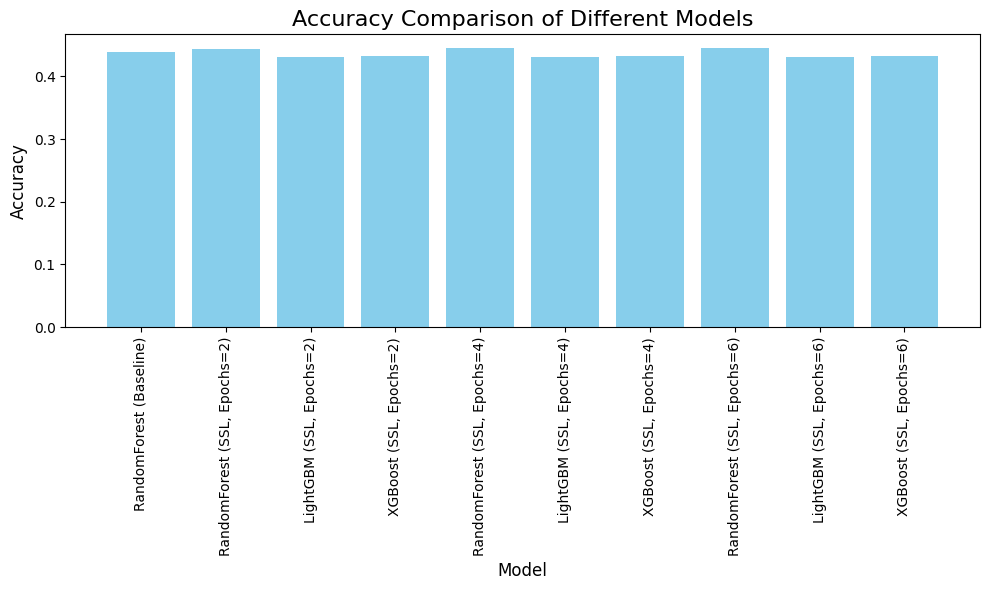

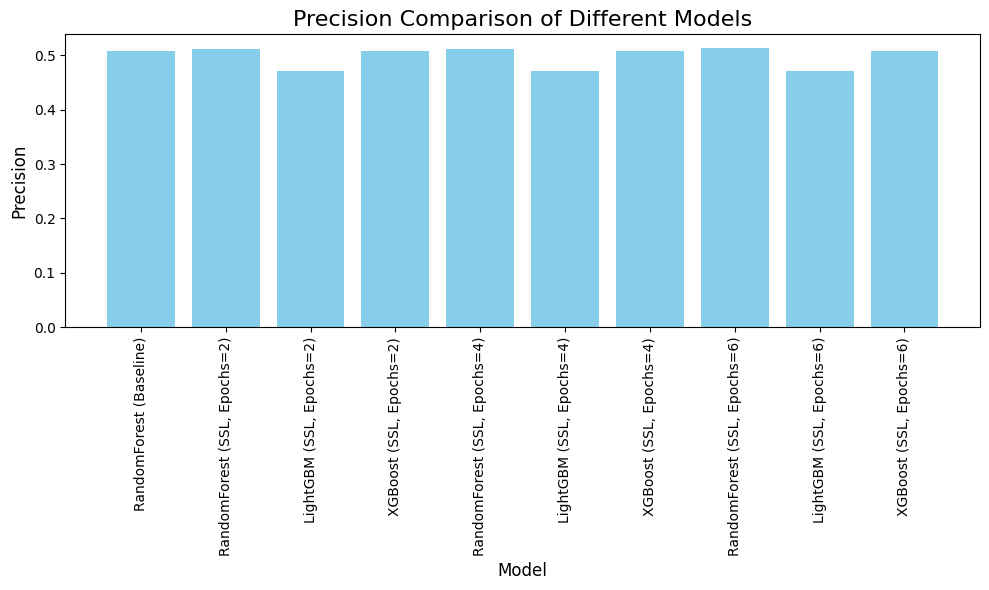

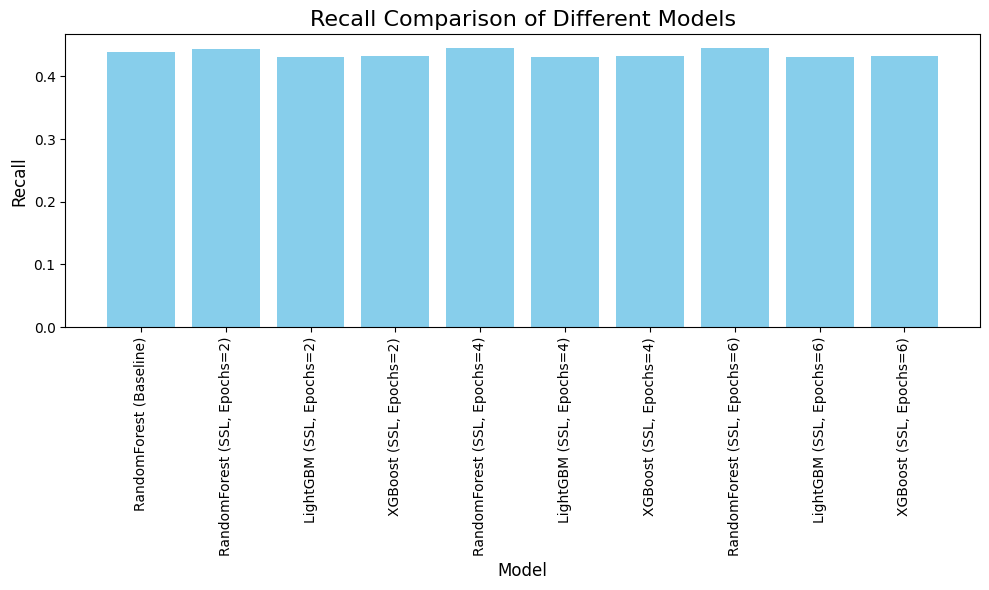

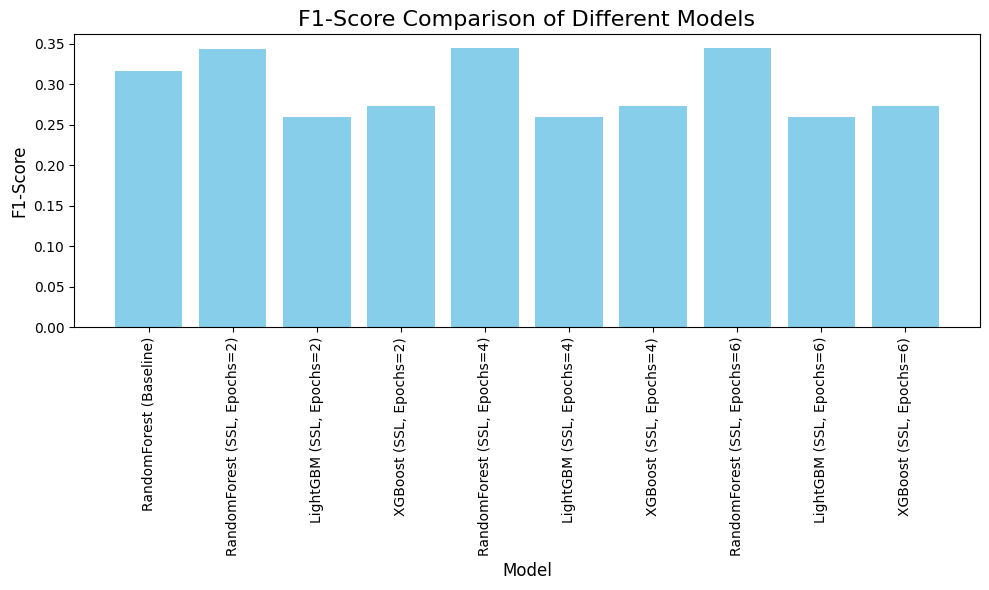

In [49]:
import matplotlib.pyplot as plt

# Plot the performance metrics
def plot_comparison(df, metric='Accuracy'):
    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Plot bars for each model and metric
    plt.bar(df['Model'], df[metric], color='skyblue')

    # Rotate the x-axis labels for readability
    plt.xticks(rotation=90)

    # Add title and labels
    plt.title(f'{metric} Comparison of Different Models', fontsize=16)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(f'{metric}', fontsize=12)

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot accuracy, precision, recall, and F1-score for each model
plot_comparison(model_comparison_df, metric='Accuracy')
plot_comparison(model_comparison_df, metric='Precision')
plot_comparison(model_comparison_df, metric='Recall')
plot_comparison(model_comparison_df, metric='F1-Score')
